# Dados sobre Chamadas 911

### Importando Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carregando o arquivo csv em um DataFrame

In [4]:
df = pd.read_csv('https://dadosdatascience.netlify.com/911.csv')

### Obtendo informações básicas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Checando o head do DataFrame

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Respondendo Questões Básicas

### Quais são os top 5 zipcodes para chamadas 911?

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Quais são as top 5 townships para chamadas 911?

In [6]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Quantos títulos únicos existem na coluna title?

In [7]:
len(df['title'].unique())

110

In [8]:
df['title'].nunique()

110

## Criando Novas Características

Na coluna títulos existe 'Reasons/Departments' especificados antes do código do título. Esses são EMS, Fire e Traffic. Utilize .apply() com uma função lambda customizada para criar uma nova coluna chamada 'Reason' que contém esse valor de string.

Por exemplo, se o valor da coluna title é EMS: BACK PAINS/INJURY, o valor da coluna Reason seria EMS.

In [9]:
x = df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [10]:
x.split(':')[0]

'EMS'

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df['Reason'].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: Reason, dtype: object

### Qual é a razão mais comum para chamada 911 baseado nessa nova coluna

In [13]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Agora use seaborn para criar um countplot de chamadas 911 por Reason

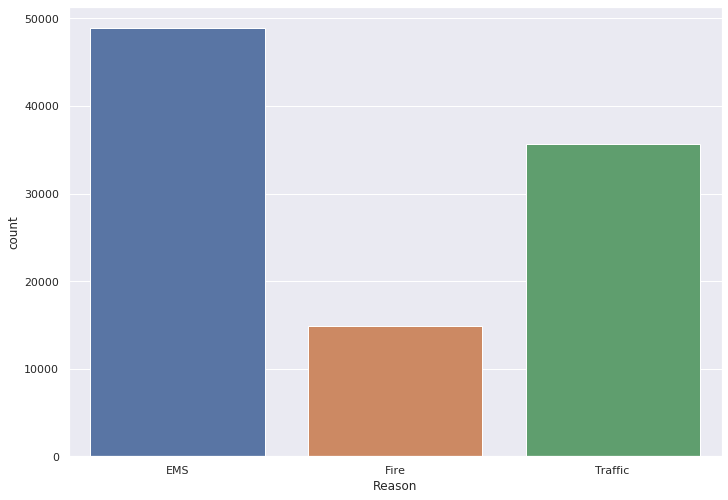

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Reason',data=df)

### Agora vamos focar em informação temporal. Qual é o tipo de dados dos objetos na coluna timeStamp

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [17]:
type(df['timeStamp'].iloc[0])

str

### Você deve ter notado que esses timestamps ainda são strings. Utilize pd.to_datetime para converter a coluna de strings para objetos DateTime

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [19]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Podemos agora capturar atributos específicos de um objeto DateTime ao chamarmos eles. Por exemplo

In [20]:
time = df['timeStamp'].iloc[0]

In [21]:
time.hour

17

Podemos utilizar o método [tab] do Jupyter Notebook para explorarmos os diversos atributos e métodos que podemos chamar. Agora que a coluna timeStamp é um objeto DateTime, utilize .apply() para criar 3 novas colunas chamadas Hour, Month, e Day of Week. Você poderá criar essas colunas baseando-se na coluna timeStamp

In [22]:
time

Timestamp('2015-12-10 17:40:00')

In [23]:
time.dayofweek

3

In [24]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [25]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


### Perceba que o Day of Week é um inteiro 0-6. Utilize a função .map() com esse dicionário para mapear os nomes de string para os dias da semana

dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [27]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [28]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


### Utilize seaborn para criar um countplot da coluna Day of Week com o hue baseado na coluna Reason

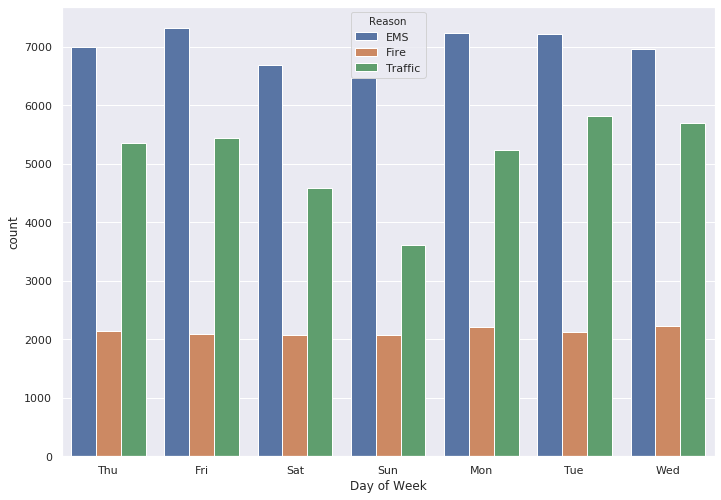

In [30]:
sns.countplot(x='Day of Week', data=df, hue='Reason')

### Faça o mesmo para a Coluna Month

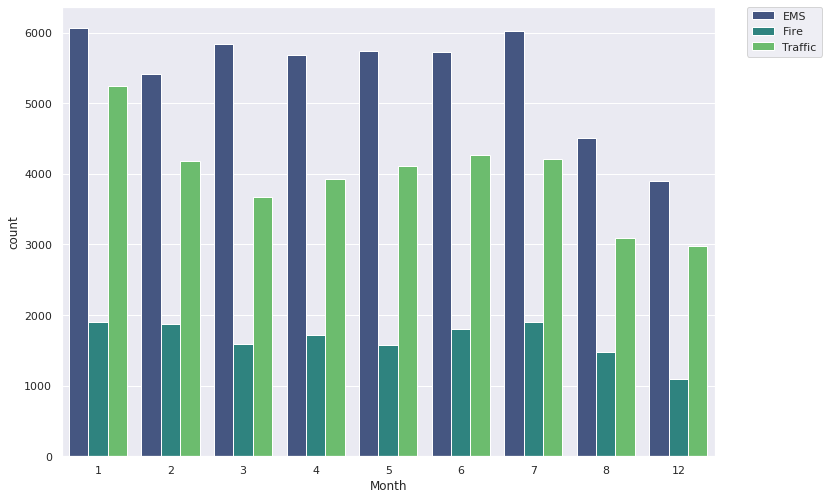

In [31]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Você percebeu algo estranho com o gráfico?

Você deve ter percebido que está faltando alguns Months, vejamos se conseguimos preencher essa informação ao plotarmos a informação de outra maneira, possivelmente um simples gráfico de linhas que preenche os Months faltantes, para fazermos isso, precisaremos usar algumas técnicas de pandas...

### Crie um objeto groupby chamado byMonth, onde você agrupa o DataFrame pela coluna Month e utilize o método count() para agregação. 

In [32]:
byMonth = df.groupby('Month').count()

In [33]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Agora crie um simples gráfico do DataFrame indicando a contagem de chamadas por Month

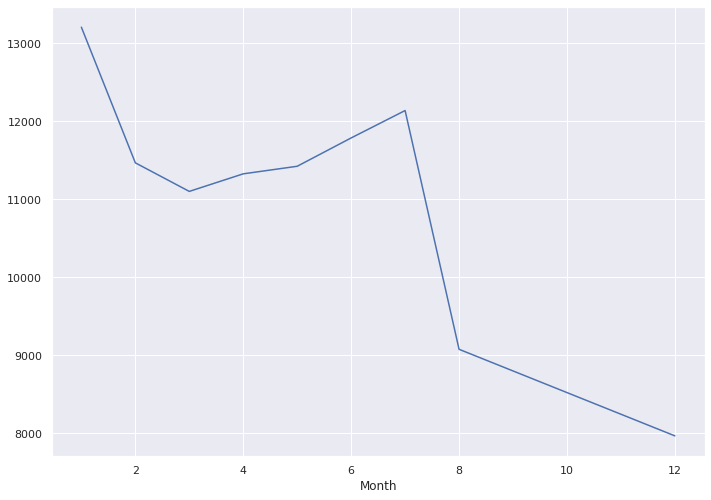

In [34]:
byMonth['lat'].plot()

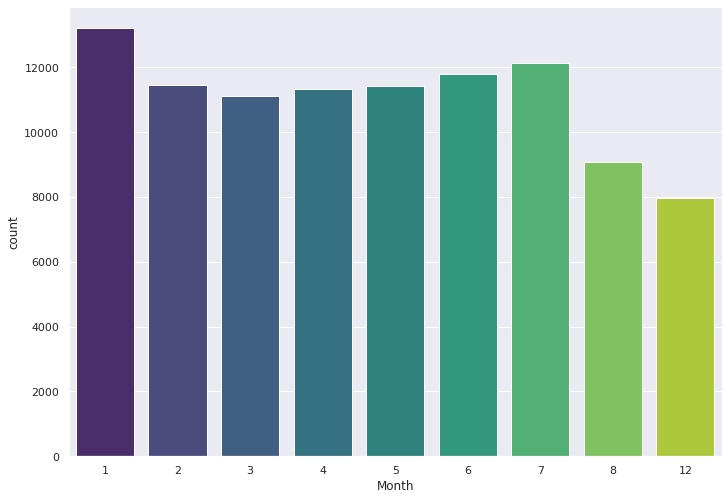

In [35]:
sns.countplot(x='Month', data=df, palette='viridis')

### Utilize seaborn lmplot() para criar um ajuste linear no número de chamadas por Month. Tenha em mente que você talvez tenha que resetar o index para uma coluna

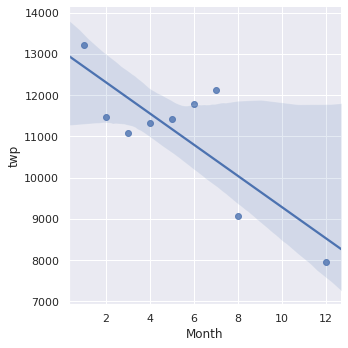

In [56]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index(),)

### Crie uma nova coluna chamada 'Date' que contém a data da coluna timeStamp. Você precisará utilizar apply() junto do método .date()

In [37]:
t = df['timeStamp'].iloc[0]

In [38]:
t

Timestamp('2015-12-10 17:40:00')

In [39]:
t.date()

datetime.date(2015, 12, 10)

In [40]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [41]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


### Agora agrupe essa coluna Date com o count() e crie um gráfico de contagens de chamadas 911

In [42]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


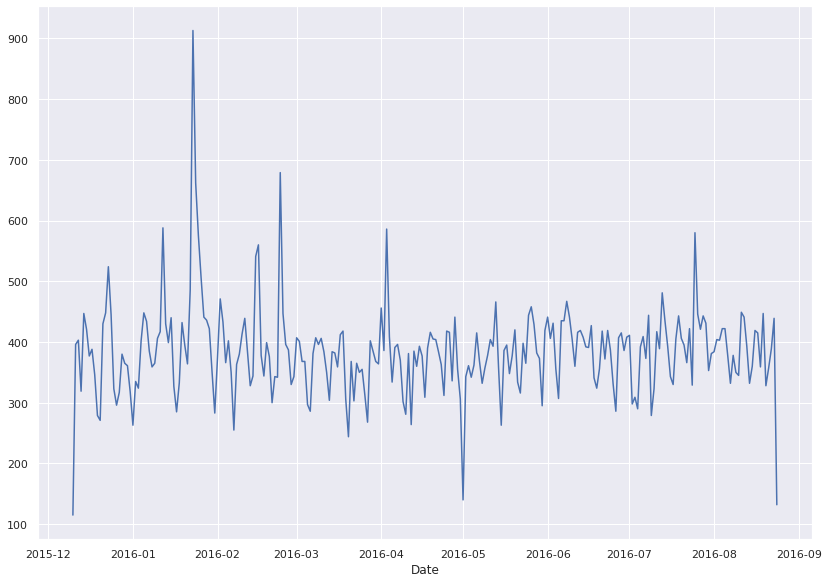

In [43]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

### Agora recrie esse gráfico, porém crie 3 gráficos separados com cada gráfico representando uma Reason para chamada 911

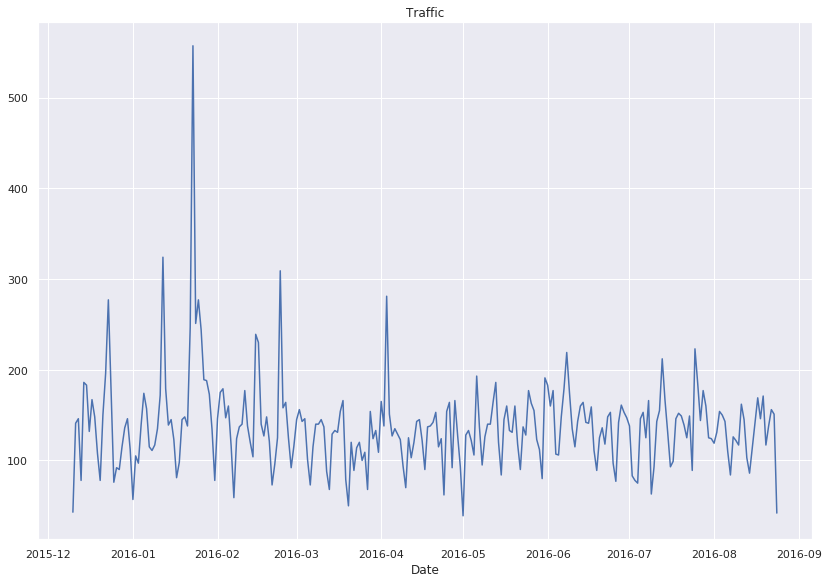

In [44]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

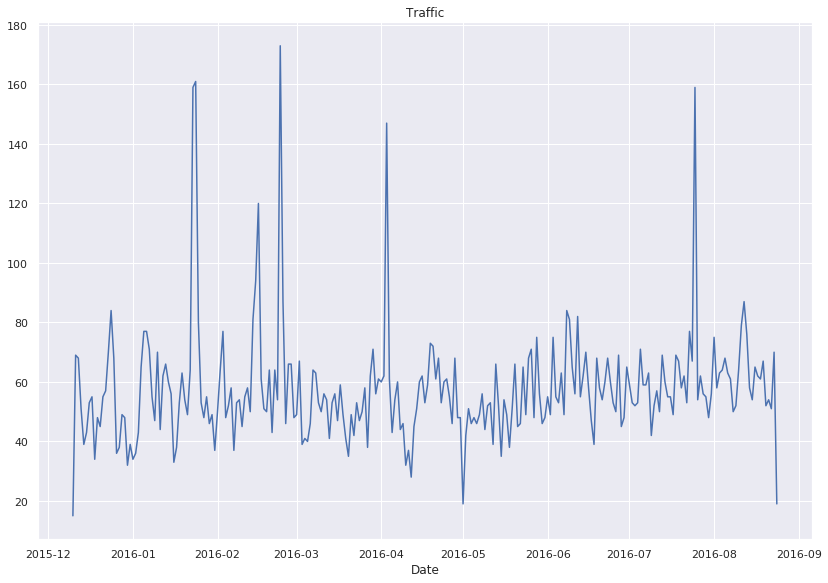

In [45]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

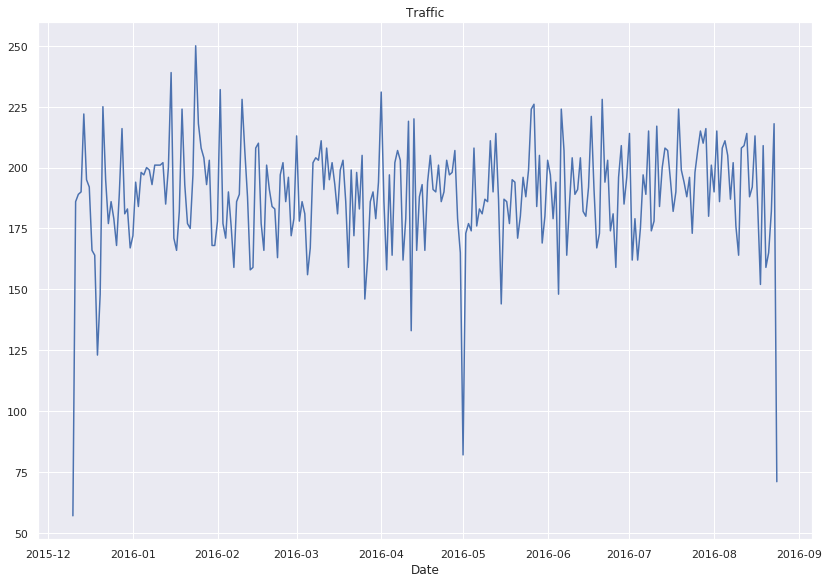

In [46]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

Agora vamos criar heatmaps com seaborn e nossos dados. Primeiro teremos que reeestruturar o DataFrame de forma que as colunas se tornem as Horas e o Index se torna Day of the Week. Existem diversas formas de executar essa tarefa, recomendados tentar combinar groupby com o método unstack

In [47]:
df.groupby(by=['Day of Week', 'Hour']).count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201

In [48]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].head()

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
Name: Reason, dtype: int64

In [49]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [50]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

### Criando um HeatMap

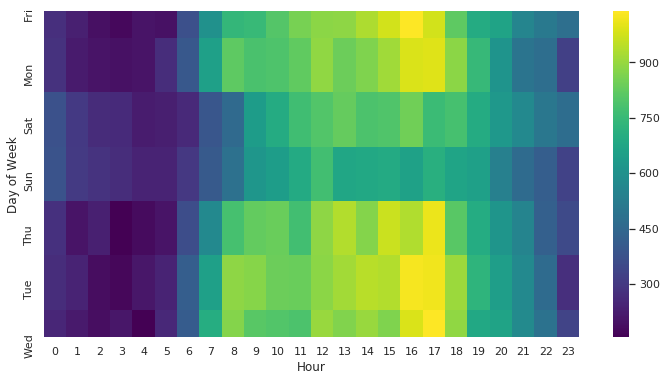

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

### Criando um ClusterMap

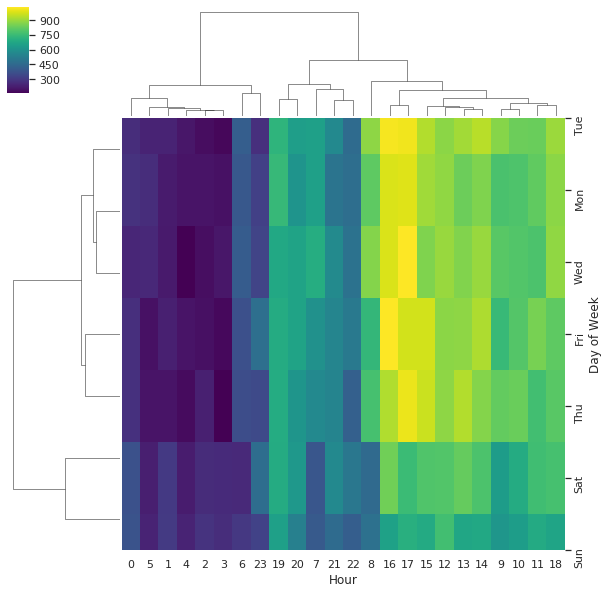

In [52]:
sns.clustermap(dayHour, cmap='viridis')

### Agora repita esses mesmos gráficos e operações para o DataFrame que mostra o Month como coluna

In [53]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


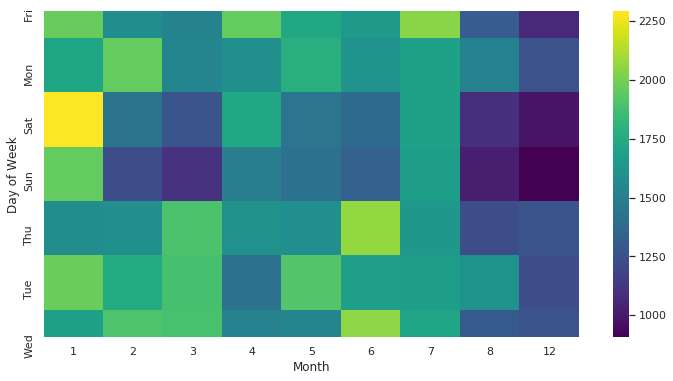

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

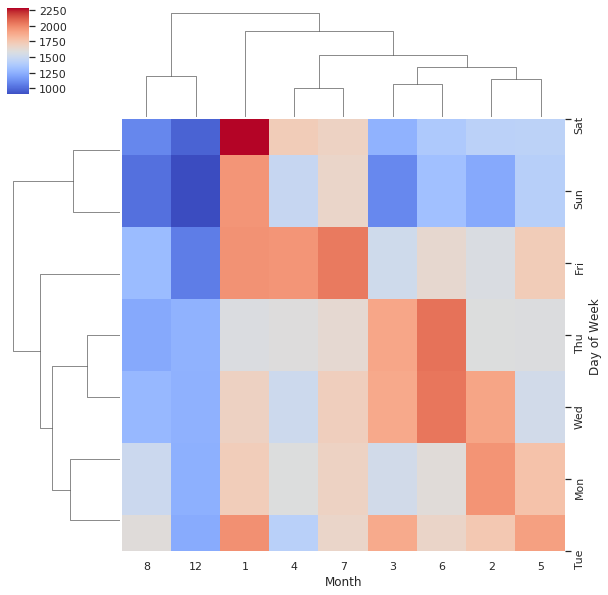

In [55]:
sns.clustermap(dayMonth, cmap='coolwarm')